# Laboratório 4

Neste laboratório, vamos aplicar um pouco da teoria e prática que vimos ao longo da disciplina.

A ideia principal é que vamos trabalhar um pouco mais com os novos classificadores vistos comparação de classificadores e importância de características.

Assim como nos Laboratório 01, 02 e 03, vamos utilizar o conjunto de dados ``College``, disponível [aqui](https://www.statlearning.com/resources-python).

Só para lembrar, o conjunto de dados contém informações sobre várias faculdades e universidades dos Estados Unidos. O significado de cada informação não é essencial para este exercício. Mas alguns exemplos de informações contidas no conjunto de dados são:

- `Private`: Indica se a instituição é pública ou privada
- `Apps`: Número de aplicações recebidas
- `Accept`: Número de aplicações aceitas
- `Enroll`: Número de novos alunos matriculados
- `Top10perc`: Percentual de novos alunos do top 10% de turmas do ensino médio
- `Top25perc`: Percentual de novos alunos do top 25% de turmas do ensino médio
- ...

## Obtenção dos dados

Para obter o conjunto de dados, execute o comando abaixo. O arquivo ``College.csv`` será diretamente acessível por meio desse *notebook*.

**Observação:** caso a sessão do *notebook* seja interrompida, será necessário baixar o conjunto de dados novamente.

In [15]:
!wget https://www.statlearning.com/s/College.csv

--2025-03-10 20:25:55--  https://www.statlearning.com/s/College.csv
Resolving www.statlearning.com (www.statlearning.com)... 198.49.23.145, 198.185.159.145, 198.49.23.144, ...
Connecting to www.statlearning.com (www.statlearning.com)|198.49.23.145|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/5fffe064464c2528214f6bde/1610604644365/College.csv [following]
--2025-03-10 20:25:57--  https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/5fffe064464c2528214f6bde/1610604644365/College.csv
Resolving static1.squarespace.com (static1.squarespace.com)... 151.101.92.238
Connecting to static1.squarespace.com (static1.squarespace.com)|151.101.92.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74924 (73K) [text/csv]
Saving to: ‘College.csv.6’

College.csv.6       100%[===================>]  73.17K  --.-KB/s    in 0.03s   

2025-03-10 20:25:57 (2.72 MB/s) - ‘Coll

**ATENÇÃO:** você não deve remover ou adicionar células no restante deste *notebook*.

Sempre escreva suas respostas nas células indicadas!

## Leitura e Preparação dos Dados [Não vale pontos, mas é necessário]

Repita a Parte I do Laboratório 01. Ou seja, prepare o conjunto de dados seguindo as instruções dos Itens 1.1 a 1.7 daquele Laboratório.

In [1]:
# Escreva sua resposta aqui
import pandas as pd
df = pd.read_csv("College.csv")
df.rename(columns={df.columns[0]: "College"}, inplace=True)
df = df.set_index("College")
df["Good School"] = (df["Top10perc"] > 25).astype(int)
y = df["Good School"].copy()
df.drop(columns=["Top10perc", "Top25perc", "Good School"], inplace=True)
df["Private"] = (df["Private"] == "Yes").astype(int)
df.head()

,Private,Apps,Accept,Enroll,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,
Abilene Christian University,1,1660,1232,721,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


Ao final da preparação, o *Data Frame* deve se parecer com o mostrado abaixo.

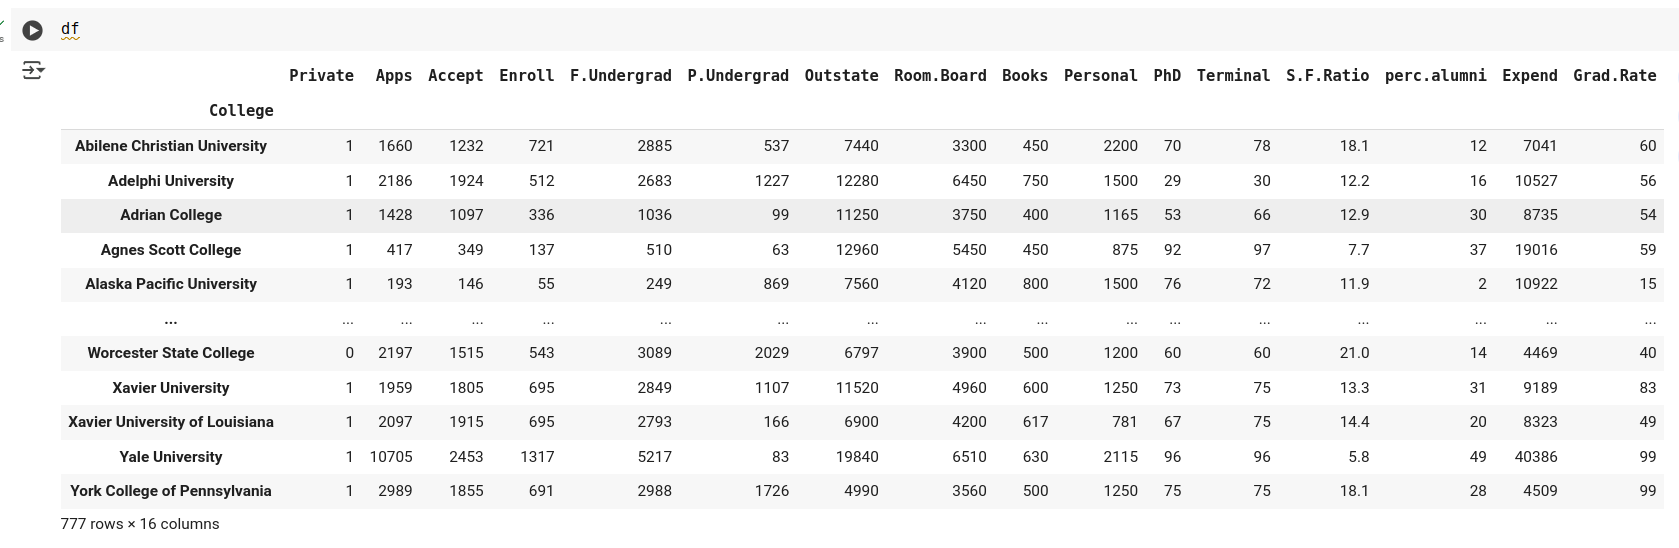

## Parte 1: KNN, Floresta Aleatória e SVM [35 pontos - Todos os itens têm o mesmo valor]

Assim como nos Laboratórios 01, 02 e 03, a tarefa de predição aqui será prever a variável `y` em função dos dados contidos no *Data Frame* resultante na parte anterior do laboratório.

Ou seja, o objetivo é criar um modelo para classificar se uma instituição de ensino é uma `Good School` ou não.

### Divisão em conjuntos de treinamento e teste.

Divida o conjunto de dados em porções distintas para treinamento e avaliação do classificador.

25% do conjunto de dados deve ser retido para testes.

Essa mesma divisão deverá ser utilizada no restante do laboratório.

O Código fornecido abaixo realiza essa separação para você e não deve ser alterado.

In [2]:
# não modifique esse código.

from sklearn.model_selection import train_test_split

X = df.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### Transformação dos dados

Antes de continuar, você deve aplicar a transformação por reescala nos dados. Lembre, o `scaler` deve ser ajustado ao conjunto de treinamento e posteriormente aplicado ao conjunto de teste.

**Atenção:**
- O conjunto de treinamento transformado deve ser armazenado na variável `X_train_scaled`.
- Similarmente, o conjunto de teste transformado, deve ser armazenado na variável `X_test_scaled`.

In [3]:
# Escreva sua resposta aqui
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25)

### Item 1.1

Treine os Classificadores [KNN](https://scikit-learn.org/1.6/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [Floresta Aleatória](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) no conjunto de dados acima.

Para isso, você deve utilizar o módulo [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

Aqui, você deve fazer o processo completo. Utilizar os dados transformados (por reescala) e realizar seleção de hiperparâmetros via validação cruzada.

Para cada um dos três classificadores, considere os seguintes conjuntos de hiperparâmetros candidatos:
- $k$ do **KNN** -- $k \in \{1, 2, 3, \dots, 30\}$.
- número de estimadores e profundidade máxima da **Floresta Aleatória** -- considere os valores $\{10, 100, 500\}$ para o número de estimadores e $\{2, 4, 6, \dots, 30\}$ para profundidade máxima.
- $C$ e $\gamma$ do **SVM** -- comumente, para isso, utiliza-se valores espaçados exponencialmente. Assim, utilize a função [`logspace`](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html) da biblioteca `numpy` para criar 10 valores espaçados exponencialmente de 0.0001 a 10000 (tanto para $C$ quanto para $\gamma$).

In [4]:
# Escreva sua resposta aqui
from sklearn.model_selection import GridSearchCV
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

#Definicao de parametros de busca para cada modelo
param_grid_knn = {"n_neighbors": np.arange(1,31)}
                                                            # de 2 até 30, de 2 em 2
param_grid_rf = {"n_estimators": [10, 100, 500], 'max_depth': np.arange(2, 31, 2)}

valores_svm = np.logspace(-4, 4, 10)
param_grid_svm = {
    'C': valores_svm,
    'gamma': valores_svm
}

lista_melhores_parametros = []

knn = KNeighborsClassifier()
                                            #Utilizar todos os nucleos do processador
knn_grid = GridSearchCV(knn, param_grid_knn, n_jobs=-1)
knn_grid.fit(X_train_scaled, y_train)
lista_melhores_parametros.append(knn_grid.best_params_)

random_forest = RandomForestClassifier()
# Por padrao o cross-validation (cv) é igual a 5 (Em todos os GridSearch)
rf_grid = GridSearchCV(random_forest, param_grid_rf, n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)
lista_melhores_parametros.append(rf_grid.best_params_)

support_vector = svm.SVC()
svm_grid = GridSearchCV(support_vector, param_grid_svm, n_jobs=-1)
svm_grid.fit(X_train_scaled, y_train)
lista_melhores_parametros.append(svm_grid.best_params_)

for hyper in lista_melhores_parametros:
    print(hyper)


{'n_neighbors': np.int64(5)}
{'max_depth': np.int64(8), 'n_estimators': 100}
{'C': np.float64(2.782559402207126), 'gamma': np.float64(0.046415888336127774)}


### Item 1.2

Para cada classificador treinado, imprima o [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) do classificador relativo aos rótulos preditos no conjunto de teste.

In [5]:
# Escreva sua resposta aqui
from sklearn.metrics import classification_report

y_pred_knn_grid = knn_grid.predict(X_test_scaled)
y_pred_rf_grid = rf_grid.predict(X_test_scaled)
y_pred_svm_grid = svm_grid.predict(X_test_scaled)


print("\tKNN\n", classification_report(y_test, y_pred_knn_grid))
print("\n")
print("\tRandom Forest\n",classification_report(y_test, y_pred_rf_grid))
print("\n")
print("\tSVM\n",classification_report(y_test, y_pred_svm_grid))

	KNN
               precision    recall  f1-score   support

           0       0.77      0.83      0.80       111
           1       0.75      0.68      0.71        84

    accuracy                           0.76       195
   macro avg       0.76      0.75      0.76       195
weighted avg       0.76      0.76      0.76       195



	Random Forest
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       111
           1       0.78      0.70      0.74        84

    accuracy                           0.78       195
   macro avg       0.78      0.77      0.78       195
weighted avg       0.78      0.78      0.78       195



	SVM
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       111
           1       0.80      0.73      0.76        84

    accuracy                           0.81       195
   macro avg       0.80      0.80      0.80       195
weighted avg       0.80      0.81      0.8

### Item 1.3

Com base nos resultados acima, o SVM teve desempenho melhor do que a Floresta Aleatória e o KNN?

**Resposta:** Sim, mas não foi uma diferença tão grande. O F1 score do SVM está em 0.86, enquanto o da árvore aleatória está em 0.85. 

## Parte 2 - Importância de Características [35 pontos - Todos os itens têm o mesmo valor]

### Item 2.1

Compute a [informação mútua](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) de entre cada característica e o rótulo (classe) do conjunto de dados.

Apresente os resultados em um gráfico de barras:
- O eixo $X$ deve ter todas as características (com os nomes) em ordem decrescente de informação mútua;
- O eixo $Y$ deve ser referente ao valor da informação mútua.

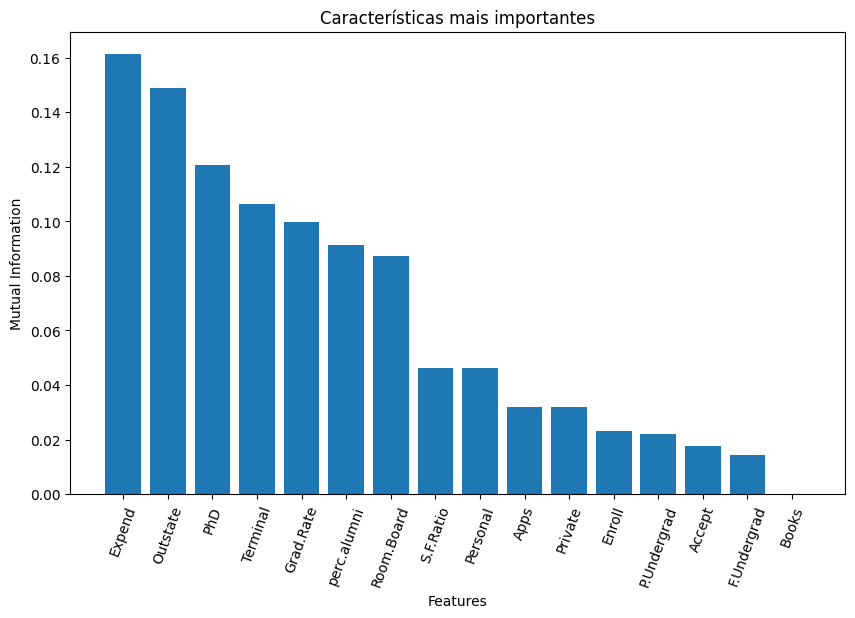

In [6]:
# Escreva sua resposta aqui
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_scaled, y)

indices_sorted = mutual_info.argsort()[::-1]
features_sorted = df.columns[indices_sorted]
mutual_info_sorted = mutual_info[indices_sorted]

plt.figure(figsize=(10, 6))
plt.bar(features_sorted, mutual_info_sorted)
plt.ylabel('Mutual Information')
plt.xlabel('Features')
plt.title('Características mais importantes')
plt.xticks(rotation=70) 
plt.show()

### Item 2.2

De acordo o resultado do Item 2.1, quais as características mais importantes no problema de predição?


**Resposta:** O Expend, o outstate, o PHD e o Terminal 

### Item 2.3

Compute a importância das características para o problema de predição utilizando o classificador [Floresta Aleatória](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_).

Apresente os resultados em um gráfico de barras:

O eixo $X$ deve ter todas as características (com os nomes) em ordem decrescente de importância;
O eixo $Y$ deve ser referente ao valor da importância.

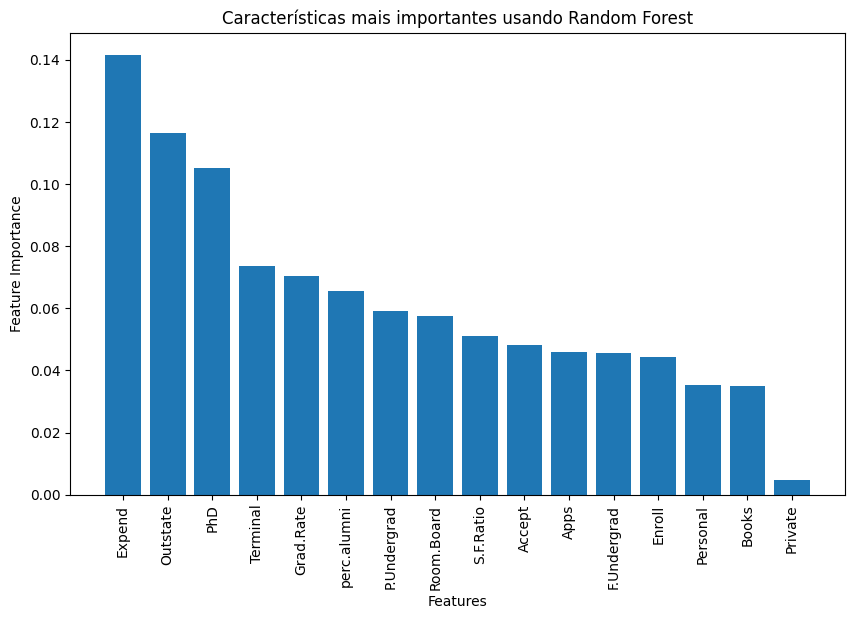

In [7]:
# Escreva sua resposta aqui
random_forest = RandomForestClassifier()
random_forest.fit(X_train_scaled, y_train)
importances = random_forest.feature_importances_

indices_sorted = np.argsort(importances)[::-1]
features_sorted = df.columns[indices_sorted]
importances_sorted = importances[indices_sorted]

plt.figure(figsize=(10, 6))
plt.bar(features_sorted, importances_sorted)
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.title('Características mais importantes usando Random Forest')
plt.xticks(rotation=90)  # Rotaciona os rótulos das características para melhor visualização
plt.show()

### Item 2.4

De acordo o resultado do Item 2.3, quais as características mais importantes no problema de predição?

Esse resultado é similar ao obtido no Item 2.1? Comente as semelhanças e diferenças.


**Resposta:** É o Expend, o Phd, o terminal e o Outstate.
Sim, é semelhante, mas a ordem está diferente. O outstate está em segundo de mais relevância, por exemplo.

### Item 2.5

Utilizando [SHAP](https://shap.readthedocs.io/en/latest/), faça o gráfico [`Beeswarm`](https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/beeswarm.html).

Consulte o material da disciplina para construir o gráfico de forma correta. É importante que o nome das características estejam no eixo $Y$.

**Observação:** é importante instalar o módulo `shap` antes. O código para isso está na célula abaixo.

In [8]:
# não mude nada aqui

!pip install shap

Defaulting to user installation because normal site-packages is not writeable


/home/kelvin/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


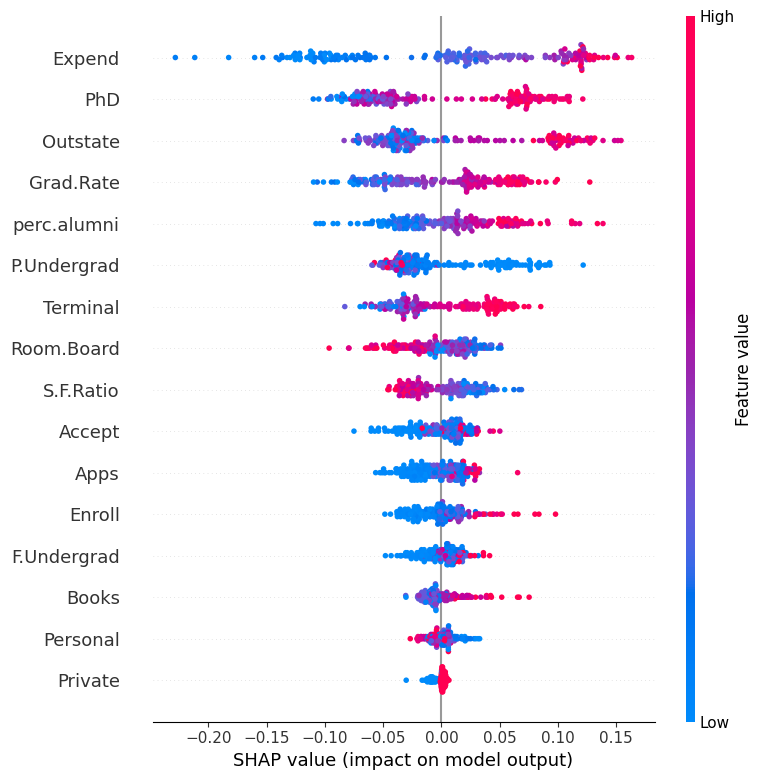

In [9]:
# Escreva sua resposta aqui
import shap
explainer = shap.Explainer(random_forest)
shap_values = explainer(X_test_scaled)[:, :, 1]
shap.summary_plot(shap_values, X_test_scaled, feature_names=df.columns)

### Item 2.6

Comente os resultados do gráfico construído no Item 2.5.

Quais são as características mais importantes para o problema de predição? Essas características são as mesmas identificadas no Itens 2.1 e 2.3?

Quais outros fatos importantes sobre o modelo podem ser extraídos da Figura?

**Resposta:** Continuam sendo o PHD, o expend e o outstate.

Enquanto podemos observar que, um Room Board mais baixo puxam a predição para baixo, ou seja, que não seja uma Good School.

Podemos observar também que o fato de ser ou não privada não impacta em nada no modelo.

##Parte 3 - Comparação de Modelos com Testes de Hipótese [30 pontos - Todos os itens têm o mesmo valor]

### Item 3.1

Nessa última parte do laboratório, vamos atacar duas perguntas:

- Para o problema de classificação sendo estudado, o KNN é equivalente à Floresta Aleatória?
- Para o problema de classificação sendo estudado, a Floresta Aleatória é equivalente ao SVM?

Para responder essas perguntas, iremos utilizar o Teste $t$ pareado (Vide material da disciplina). Para isso, você deverá repedir o experimento da Parte I 50 vezes. Em cada repetição:

1. Realize uma divisão do conjunto de dados em porções de treinamento e teste. Nesse momento, é importante não fixar o parâmetro `random_state` do método `train_test_split`.

2. Ajustar um `scaler` para aplicar a transformação por reescala nos dados. Lembre, o `scaler` deve ser ajustado nos dados de treinamento.

3. Treinar os classificadores KNN, Floresta Aleatória e SVM na porção dos dados reservada para treinamento. Nesse passo, você deve utilizar os hiperparâmetros selecionados no treinamento realizado no Item 1.1.

4. Utilizar os modelos treinados para prever os rótulos dos elementos do conjunto de teste.

5. Computar o $F_1$-score dos três classificadores e armazenar esses valores.

In [10]:
# Escreva sua resposta aqui
from sklearn.metrics import f1_score
scores = []
for i in range(0,50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    knn = KNeighborsClassifier()
    knn_grid = GridSearchCV(knn, param_grid_knn, n_jobs=-1)
    knn_grid.fit(X_train_scaled, y_train)
    y_pred_knn_grid = knn_grid.predict(X_test_scaled)
    score_knn = f1_score(y_test, y_pred_knn_grid, average = 'weighted')

    random_forest = RandomForestClassifier()
    rf_grid = GridSearchCV(random_forest, param_grid_rf, n_jobs=-1)
    rf_grid.fit(X_train_scaled, y_train)
    y_pred_rf_grid = rf_grid.predict(X_test_scaled)
    score_rf = f1_score(y_test, y_pred_rf_grid, average = 'weighted')

    support_vector = svm.SVC()
    svm_grid = GridSearchCV(support_vector, param_grid_svm, n_jobs=-1)
    svm_grid.fit(X_train_scaled, y_train)
    y_pred_svm_grid = svm_grid.predict(X_test_scaled)

    score_svm = f1_score(y_test, y_pred_svm_grid, average = 'weighted')

    scores.append([score_knn, score_rf, score_svm])

df = pd.DataFrame(scores, columns = ['KNN', 'Random Forest', "SVM"])
df.describe()


,KNN,Random Forest,SVM
count,50.000000,50.000000,50.000000
mean,0.766337,0.794867,0.788468
std,0.026621,0.028263,0.023452
min,0.682531,0.723636,0.744154
25%,0.749312,0.777291,0.772133
50%,0.762739,0.799449,0.785905
75%,0.786847,0.809570,0.804111
max,0.821065,0.856494,0.845776


### Item 3.2

Faça um gráfico Box-Plot para os $F_1$-scores dos três classificadores. Ou seja, uma única figura com um box-plot para cada classificador.

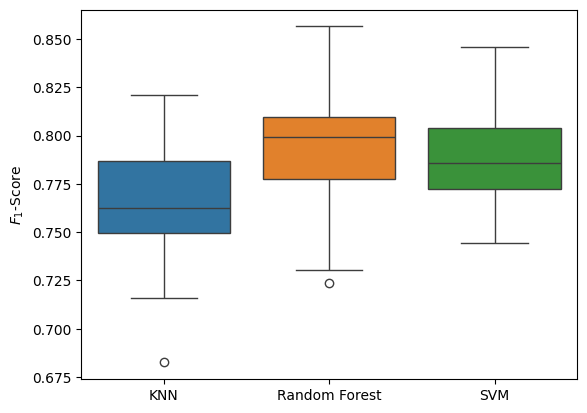

In [11]:
# Escreva sua resposta aqui
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data = df)
plt.ylabel(r'$F_1$-Score');

### Item 3.3

Faça um gráfico de barras, com intervalo de confiança de 95%, para os  $F_1$-scores dos três classificadores. Ou seja, uma única figura com uma barra para cada classificador.

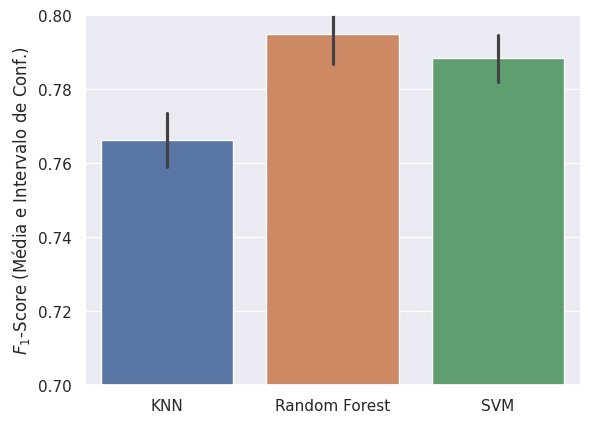

In [12]:
#@title

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

sns.barplot(data = df)
plt.ylim((0.7, 0.8))
plt.ylabel(r'$F_1$-Score (Média e Intervalo de Conf.)');

### Item 3.4

Com base nos gráficos dos Itens 3.2 e 3.3:
1. Há alguma evidência de que o KNN seja melhor, pior ou equivalente à Floresta Aleatória?
2. Há alguma evidência de que a Floresta Aleatória seja melhor, pior ou equivalente ao SVM?

**Resposta:** De acordo com os gráficos, o KNN é pior do que a floresta aleatória, dado que a mesma possui f1-scores superiores e uma média de intervalo maior.

De acordo com os gráficos, a floresta aleatória é melhor doque o SVM. 

### Item 3.5

Utilize o teste $t$ pareado para comparar o KNN com a Floresta Aleatória. Você deve imprimir o $p$-valor do teste.

In [13]:
# Escreva sua resposta aqui
from scipy import stats
result = stats.ttest_rel(df["KNN"], df["Random Forest"], alternative="less")
result.pvalue

np.float64(1.3502186564663861e-11)

### Item 3.6

Com base no resultado do Item 3.5, o desempenho do KNN (considerando $F_1$-score é equivalente ao desempenho da Floresta Aleatória?

**Resposta:** Não é equivalente, dado que o valor do pvalue foi de: 5.425843967089747e-15, ou seja, bem menor que 0.05, o que significa que o desempenho do KNN realmente é baixo e não foi apenas resultados aleatório.

### Item 3.7

Utilize o teste $t$ pareado para comparar a Floresta Aleatória com o SVM. Você deve imprimir o $p$-valor do teste.

In [14]:
# Escreva sua resposta aqui
result = stats.ttest_rel(df["Random Forest"], df["SVM"], alternative="less")
result.pvalue

np.float64(0.9745994996582723)

### Item 3.8

Com base no resultado do Item 3.7, o desempenho da Floresta Aleatória (considerando  $F_1$-score é equivalente ao desempenho do SVM?

**Resposta:** O resultado do teste pareado foi de: 0.9885174737607122. o que é MUITO alto. Nos mostrando que não há diferença entre os dois modelos, boi o valor é bem acima do aceitável (0.05). Ou seja, eles são equivalentes.